# Loading the dependencies and libraries

In [1]:
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mno

# Loading the data

In [3]:
import pandas as pd

# Path to your CSV file
csv_path = '/Users/mac/Desktop/team_02/src/post_datathon/data/pulseox_dataset.csv'


# Read the CSV file using Pandas
df_initial = pd.read_csv(csv_path, low_memory=False)

###### 


# Load the Excel file
# excel_file_path = '/Users/mac/Desktop/team_02/Dr.Vinai_src/sccm23_p50_final.xlsx'
# # sheet_name = 'Sheet1'  # Replace with your sheet name if it's different

# # Read the Excel file
# df_initial = pd.read_excel(excel_file_path)

# # Convert the DataFrame to a CSV file
# csv_file_path = 'path_to_your_csv_file.csv'  # Replace with your desired CSV file path
# df.to_csv(csv_file_path, index=False)  # Set index=False if you do not want to write row indices

###### 

# Data Preprocessing

In [4]:
df_initial

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49088,44897,49088,49088,19995595,21784060,34670930,mimic_iv,9999,>= 500,True,...,1500.0,0.0,1500.0,2.0,1500.0,1.0,1500.0,0.0,1500.0,1.0
49089,44898,49089,49089,19995780,21942461,36805359,mimic_iv,9999,>= 500,True,...,1557.0,2.0,1557.0,0.0,1557.0,1.0,1557.0,2.0,1557.0,0.0
49090,44899,49090,49090,19997293,28847872,31877557,mimic_iv,9999,>= 500,True,...,1557.0,0.0,1557.0,0.0,1557.0,1.0,1557.0,1.0,1557.0,1.0
49091,44900,49091,49091,19997367,20617667,35616526,mimic_iv,9999,>= 500,True,...,1557.0,3.0,1557.0,2.0,1557.0,1.0,1557.0,1.0,1557.0,1.0


In [5]:
df_initial.shape

(49093, 142)

In [6]:
# Assume 'df_initial' is your DataFrame
column_names = df_initial.columns.tolist()

print("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

## Keeping relevant columns only

In [7]:
# List of columns to keep (N.B I removed subject_id) 
# all the ID columns are irrelevant 
columns_to_keep = ['source_db', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'vitals_tempc', 'cbc_hemoglobin', 'bmp_sodium', 'bmp_bicarbonate', 'bmp_creatinine', 'sofa_past_overall_24hr', 'sofa_past_cardiovascular_24hr']

# Select only the columns you want to keep
df_filtered = df_initial[columns_to_keep]

In [8]:
df_filtered.shape

(49093, 24)

## Computing p50

In [9]:
# Create a Copy to ensure no modification of a slice of the original DataFrame
df_filtered = df_filtered.copy()
df_filtered.loc[:, 'p50'] = ((100 * (df_filtered['pO2']**2.711) / df_filtered['SpO2']) - (df_filtered['pO2']**2.711))**(1/2.711)

In [10]:
# checking our new list of columns 
column_names_withp50 = df_filtered.columns.tolist()

print("Column names:", column_names_withp50)

Column names: ['source_db', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'vitals_tempc', 'cbc_hemoglobin', 'bmp_sodium', 'bmp_bicarbonate', 'bmp_creatinine', 'sofa_past_overall_24hr', 'sofa_past_cardiovascular_24hr', 'p50']


In [11]:
df_filtered.shape

(49093, 25)

## Handling outliers

In [12]:
# identify and handle potentially erroneous or extreme values in the specified columns by replacing them with NaN.
df_filtered.loc[df_filtered["pCO2"] == 0.0, "pCO2"] = np.NAN # for pCO2 = 0 
df_filtered.loc[df_filtered["pH"] > 8.0, "pH"] = np.NAN # for pH>8 
df_filtered.loc[df_filtered["cbc_hemoglobin"] > 30.0, "cbc_hemoglobin"] = np.NAN # for cbc_hemoglobin > 30.0

# only keep 10 < p50< 100
# instead of replacing with NaNs just remove the nonvalid entries 
df_filtered = df_filtered.loc[(df_filtered['p50'] >= 10) & (df_filtered['p50'] <= 100)]

In [13]:
df_filtered.shape

(30490, 25)

## Handling Missing values

In [14]:
# Check for missing values in the entire DataFrame
missing_values = df_filtered.isna()  # or df.isnull() 

# Check if there are any missing values in the entire DataFrame
if missing_values.any().any():
    print("There are missing values in the DataFrame.")
else: 
    print("There are no missing values in the DataFrame.")

There are missing values in the DataFrame.


### Find the percentage of missing values per column 

In [15]:
# Count the number of missing values per column
missing_values_count = df_filtered.isna().sum()

# Calculate the total number of cells in the DataFrame
total_cells = df_filtered.size

# Calculate the total number of missing values in the entire DataFrame
total_missing_values = missing_values_count.sum()

# Calculate the total percentage of missing values in the entire DataFrame
total_percentage_missing = (total_missing_values / total_cells) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': df_filtered.columns,
    'Percentage Missing (%)': (missing_values_count / len(df_filtered)) * 100
})

# Print the missing data summary
print(missing_data_summary)

# Print the total percentage of missing values in the entire DataFrame
print("Total Percentage Missing in DataFrame: {:.2f}%".format(total_percentage_missing))


                                                      Column  \
source_db                                          source_db   
admission_age                                  admission_age   
sex_female                                        sex_female   
weight_admission                            weight_admission   
height_admission                            height_admission   
BMI_admission                                  BMI_admission   
los_hospital                                    los_hospital   
los_ICU                                              los_ICU   
comorbidity_score_name                comorbidity_score_name   
comorbidity_score_value              comorbidity_score_value   
in_hospital_mortality                  in_hospital_mortality   
race_ethnicity                                race_ethnicity   
pH                                                        pH   
pCO2                                                    pCO2   
pO2                                     

In [16]:
# Calculate the percentage of rows (patients) with at least one missing value
percentage_rows_with_missing = (df_filtered.isnull().any(axis=1).sum() / len(df_filtered)) * 100

# Print the percentage of rows with at least one missing value
print("Percentage of rows with at least one missing value: {:.2f}%".format(percentage_rows_with_missing))

Percentage of rows with at least one missing value: 46.79%


### Drop missing values for the columns with < 5% missing values 
Columns: admission_age, weight_admission, height_admission, BMI_admission, comorbidity_score_value, in_hospital_mortality, pH, pCO2

In [17]:
df_filtered_1 = df_filtered.dropna(subset=["sofa_past_overall_24hr", "admission_age", "weight_admission", "height_admission","BMI_admission", "comorbidity_score_value", "in_hospital_mortality", "pH", "pCO2"])

# for now dropping sofa_past_overall_24hr even if 20% of the column is missing -> need to consider another approach later !!! 

In [18]:
df_filtered_1.shape

(23224, 25)

In [19]:
# Count the number of missing values per column
missing_values_count = df_filtered_1.isna().sum()

# Calculate the total number of cells in the DataFrame
total_cells = df_filtered_1.size

# Calculate the total number of missing values in the entire DataFrame
total_missing_values = missing_values_count.sum()

# Calculate the total percentage of missing values in the entire DataFrame
total_percentage_missing = (total_missing_values / total_cells) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': df_filtered.columns,
    'Percentage Missing (%)': (missing_values_count / len(df_filtered)) * 100
})

# Print the missing data summary
print(missing_data_summary)

# Print the total percentage of missing values in the entire DataFrame
print("Total Percentage Missing in DataFrame: {:.2f}%".format(total_percentage_missing))


                                                      Column  \
source_db                                          source_db   
admission_age                                  admission_age   
sex_female                                        sex_female   
weight_admission                            weight_admission   
height_admission                            height_admission   
BMI_admission                                  BMI_admission   
los_hospital                                    los_hospital   
los_ICU                                              los_ICU   
comorbidity_score_name                comorbidity_score_name   
comorbidity_score_value              comorbidity_score_value   
in_hospital_mortality                  in_hospital_mortality   
race_ethnicity                                race_ethnicity   
pH                                                        pH   
pCO2                                                    pCO2   
pO2                                     

### Imputation of missing values using regression for columns with missing values >5%
Columns: vitals_tempc, cbc_hemoglobin, bmp_sodium, bmp_bicarbonate, bmp_creatinine, sofa_past_overall_24hr, sofa_past_cardiovascular_24hr

In [20]:
missing_vars = ["vitals_tempc", "cbc_hemoglobin", "bmp_sodium", "bmp_bicarbonate", "bmp_creatinine"]

In [21]:
predictor_vars = ['admission_age', 'sex_female', 'comorbidity_score_value', 'sofa_past_overall_24hr']

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

# Create an IterativeImputer with a higher number of iterations
imputer = IterativeImputer(estimator=KNeighborsRegressor(), max_iter=10)  # You can adjust the value as needed

# Fit and transform the imputer on df_filtered_1
imputed_df_final = imputer.fit_transform(df_filtered_1[predictor_vars + missing_vars])

# Update the original DataFrame using .loc
df_filtered_1.loc[:, missing_vars] = imputed_df_final[:, -len(missing_vars):]

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_6236/440307370.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_1.loc[:, missing_vars] = imputed_df_final[:, -len(missing_vars):]


In [23]:
# aims to identify and handle potentially erroneous or extreme values in the specified columns by replacing them with NaN.
# Count missing values in each column
missing_counts = df_filtered_1.isna().sum()
print(missing_counts)

source_db                        0
admission_age                    0
sex_female                       0
weight_admission                 0
height_admission                 0
BMI_admission                    0
los_hospital                     0
los_ICU                          0
comorbidity_score_name           0
comorbidity_score_value          0
in_hospital_mortality            0
race_ethnicity                   0
pH                               0
pCO2                             0
pO2                              0
SaO2                             0
SpO2                             0
vitals_tempc                     0
cbc_hemoglobin                   0
bmp_sodium                       0
bmp_bicarbonate                  0
bmp_creatinine                   0
sofa_past_overall_24hr           0
sofa_past_cardiovascular_24hr    0
p50                              0
dtype: int64


In [24]:
df_filtered_1.shape

(23224, 25)

## Cohort Selection 

In [25]:
# Get the unique values from a specific column
unique_values = df_filtered_1['race_ethnicity'].unique()

# Print the unique values
print(unique_values)

['White' 'Black' 'Unknown' 'Hispanic OR Latino'
 'American Indian / Alaska Native' 'Asian'
 'Native Hawaiian / Pacific Islander' 'More Than One Race']


In [26]:
import pandas as pd

# Assuming filtered_df is your DataFrame and 'source_db' is the column of interest

# Calculate the count of each unique value in the source_db column
value_counts = df_filtered_1['source_db'].value_counts()

# Normalize to get percentages and multiply by 100
percentages = (value_counts / value_counts.sum() * 100).round(2)  # Rounding to 2 decimal places

# Create a new DataFrame to display options and percentages
result_df = pd.DataFrame({'Options': value_counts.index, 'Percentages': percentages})

# Print the result DataFrame
print(result_df)

             Options  Percentages
eicu            eicu        88.14
mimic_iv    mimic_iv        10.16
mimic_iii  mimic_iii         1.71


In [27]:
import pandas as pd

filtered_df = df_filtered_1

# Create a 'Gender' column based on 'sex_female'
filtered_df['Gender'] = filtered_df['sex_female'].map({0: 'Male', 1: 'Female'})

# Group the data by 'Gender' and 'race_ethnicity' and calculate the percentage
result = filtered_df.groupby(['Gender', 'race_ethnicity']).size() / len(filtered_df) * 100

# Reset the index to create a DataFrame
result = result.reset_index(name='Percentage')

# Pivot the DataFrame to have columns for females and males
pivot_table = result.pivot(index='race_ethnicity', columns='Gender', values='Percentage')

# Fill NaN values with 0
pivot_table = pivot_table.fillna(0)

# Display the table
print(pivot_table)


Gender                                 Female       Male
race_ethnicity                                          
American Indian / Alaska Native      0.284189   0.391836
Asian                                0.585601   0.779366
Black                                3.694454   4.516879
Hispanic OR Latino                   1.761109   2.032380
More Than One Race                   0.004306   0.004306
Native Hawaiian / Pacific Islander   0.008612   0.017224
Unknown                              2.906476   4.267137
White                               35.226490  43.519635


/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_6236/667450982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Gender'] = filtered_df['sex_female'].map({0: 'Male', 1: 'Female'})


## Profile Report
Provides a summary of descriptive statistics and insights about a dataset. 

In [28]:
# import pandas as pd
# from ydata_profiling import ProfileReport

# # Create a profile report
# profile = ProfileReport(filtered_df)

# # Save the report to an HTML file
# profile.to_file('report.html')

## Variable encoding
Variable encoding, also known as feature encoding or categorical encoding, is a fundamental preprocessing step in machine learning and data analysis. Its goal is to convert categorical variables (features) into a numerical format that machine learning algorithms can work with effectively. Categorical variables are those that represent categories or labels rather than numerical quantities. Encoding categorical variables is essential because many machine learning algorithms require numerical input data.

In [29]:
# Get the unique values from a specific column
unique_values = df_filtered_1['race_ethnicity'].unique()

# Print the unique values
print(unique_values)

['White' 'Black' 'Unknown' 'Hispanic OR Latino'
 'American Indian / Alaska Native' 'Asian'
 'Native Hawaiian / Pacific Islander' 'More Than One Race']


In [30]:
import pandas as pd

# Select columns with non-numeric data types
non_numeric_columns = df_filtered_1.select_dtypes(exclude=['number'])

# Check if there are any non-numeric columns
if non_numeric_columns.empty:
    print("All values are numerical.")
else:
    print("Non-numeric columns found:")
    print(non_numeric_columns)

    # Count occurrences of each unique value in non-numeric columns
    for column in non_numeric_columns:
        value_counts = df_filtered_1[column].value_counts()
        print(f"Occurrences in '{column}':")
        print(value_counts)

Non-numeric columns found:
      source_db comorbidity_score_name race_ethnicity  Gender
9          eicu               Charlson          White    Male
12         eicu               Charlson          White    Male
13         eicu               Charlson          White    Male
18         eicu               Charlson          White    Male
19         eicu               Charlson          White    Male
...         ...                    ...            ...     ...
49085  mimic_iv               Charlson        Unknown  Female
49088  mimic_iv               Charlson        Unknown    Male
49089  mimic_iv               Charlson          White    Male
49090  mimic_iv               Charlson          White    Male
49091  mimic_iv               Charlson          White  Female

[23224 rows x 4 columns]
Occurrences in 'source_db':
eicu         20469
mimic_iv      2359
mimic_iii      396
Name: source_db, dtype: int64
Occurrences in 'comorbidity_score_name':
Charlson      22828
Elixhauser      396
Name: c

In [31]:
df = df_filtered_1

In [32]:
# One-Hot Encoding

df = pd.get_dummies(df, columns=['race_ethnicity'], prefix='ethnicity')
df = pd.get_dummies(df, columns=['source_db'], prefix='source')
df = pd.get_dummies(df, columns=['comorbidity_score_name'], prefix='comorbidity_score_name')
# N.B: we are only interested in Charlson

## Handling multicollinearity

the zero stdev features are:

 Series([], Name: std, dtype: float64) 



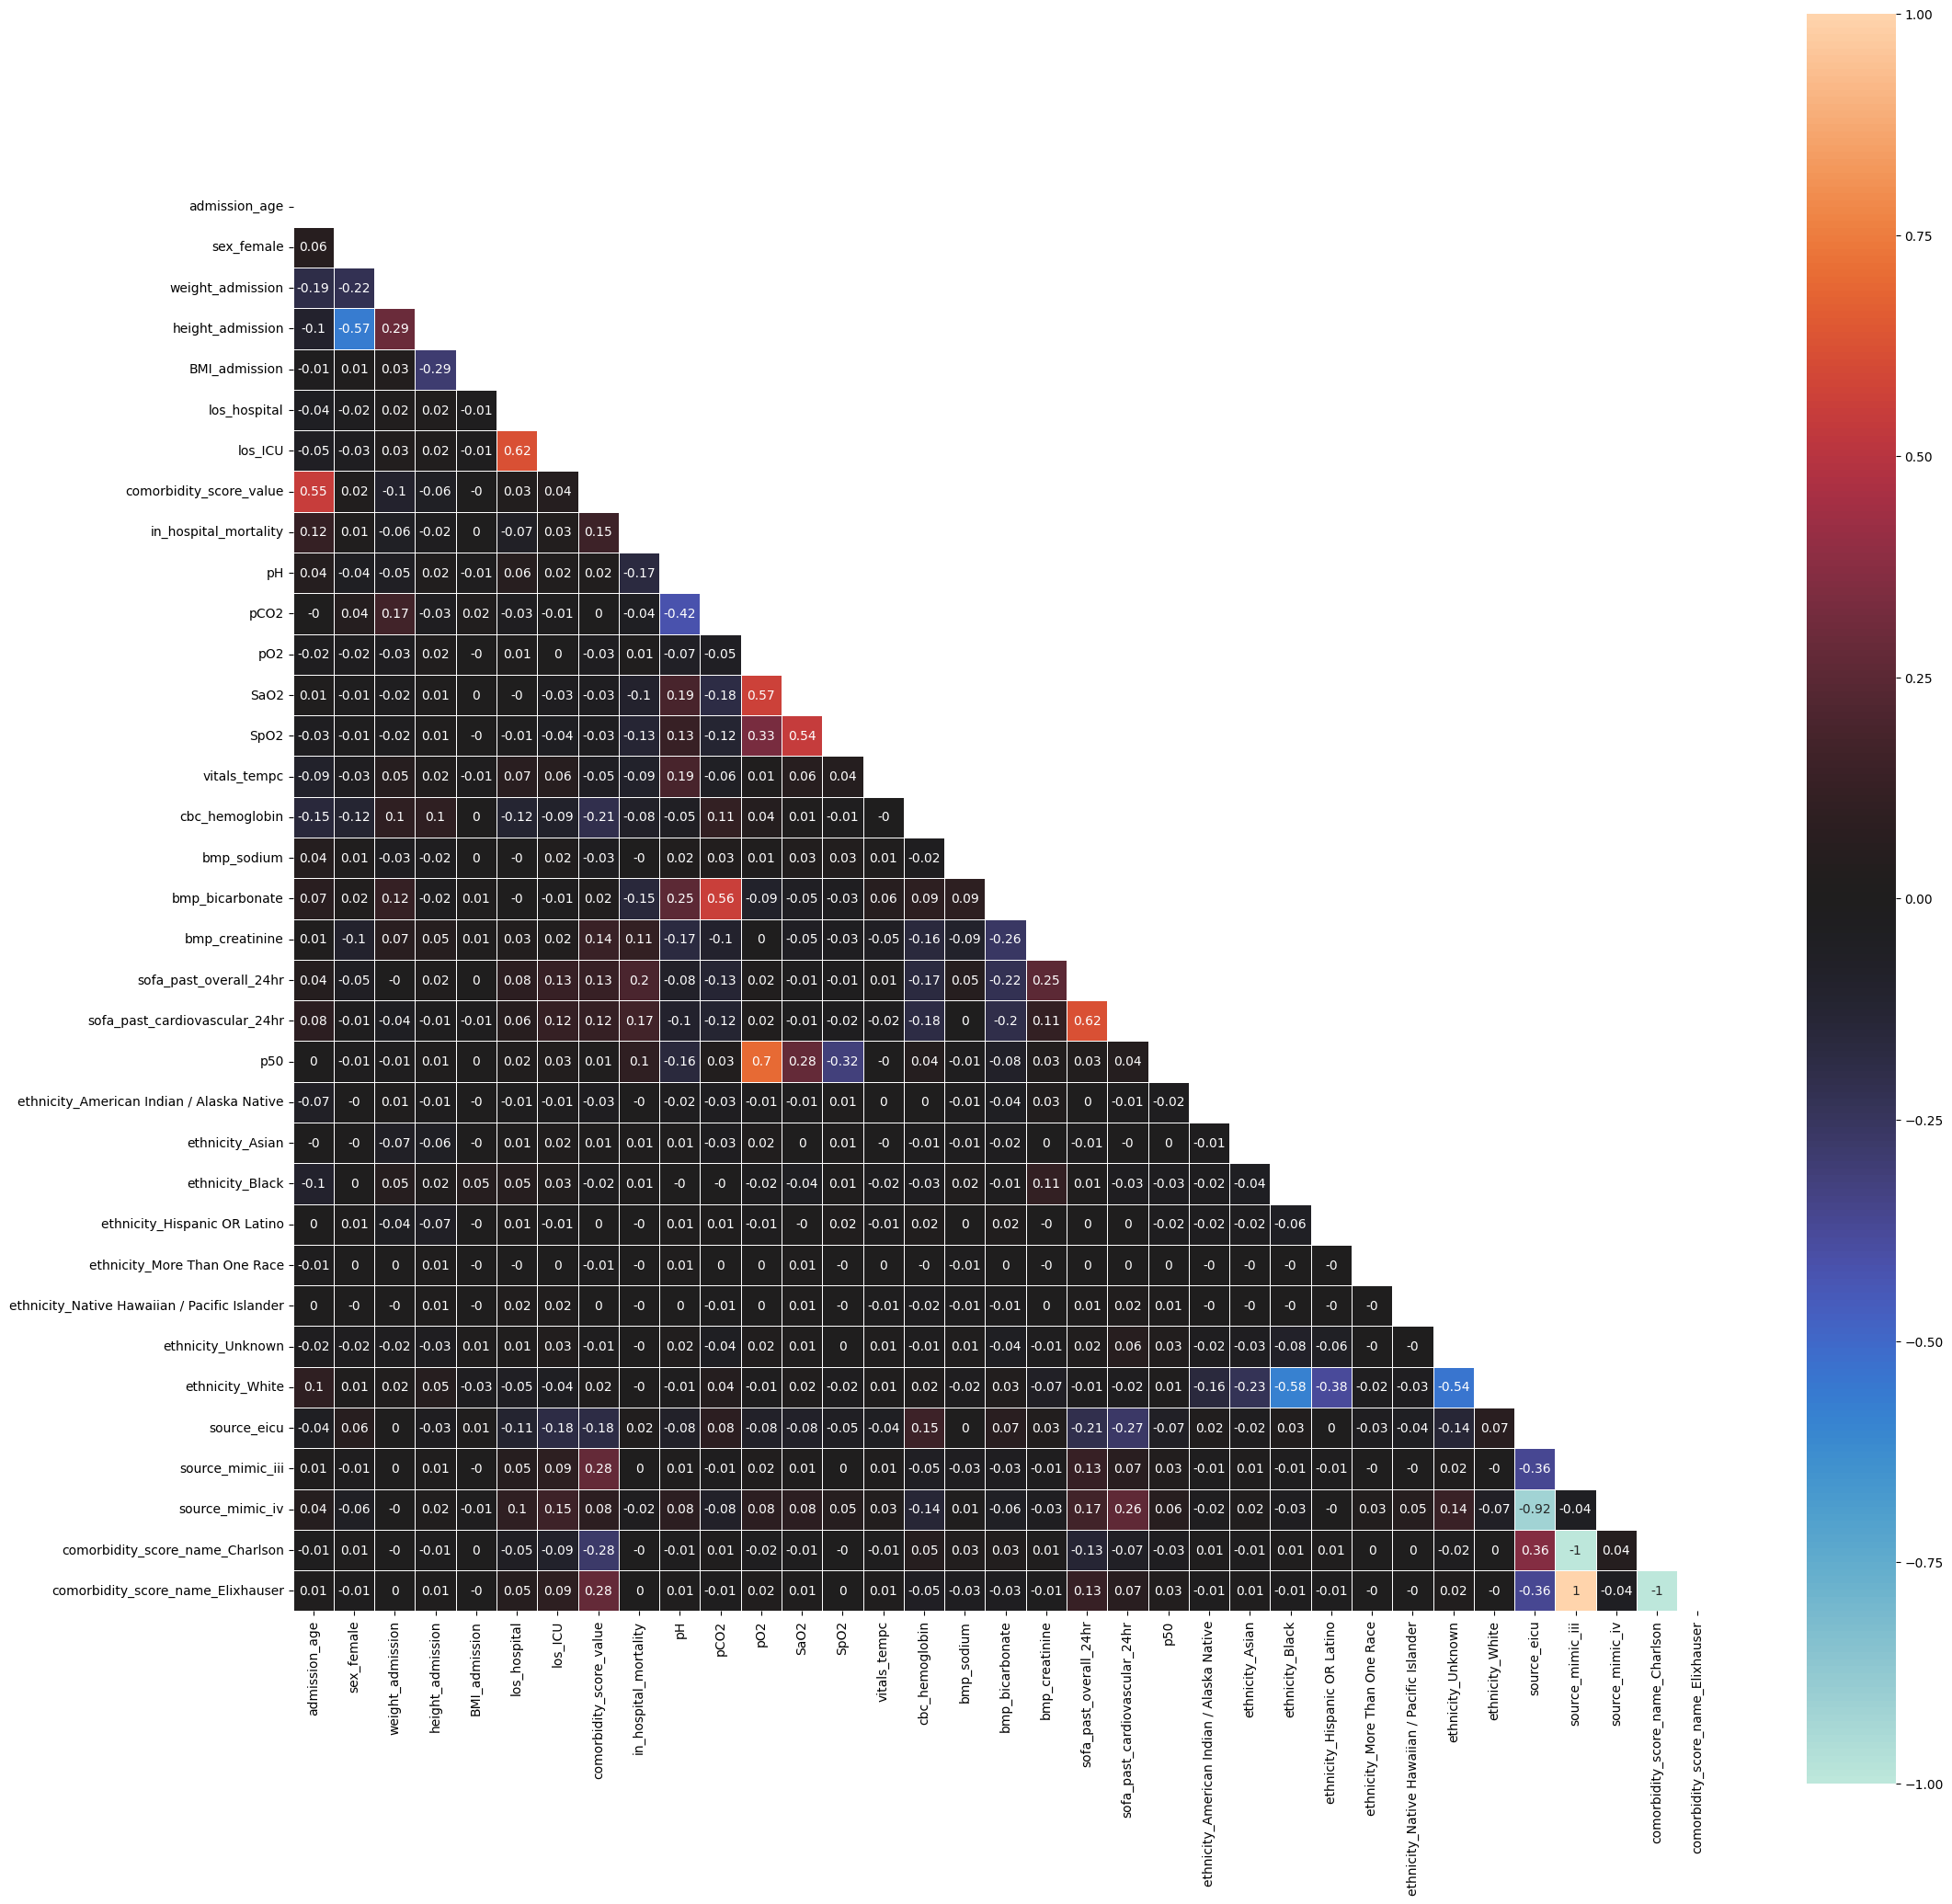

The highly Correlated features are:

 ['comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser']


/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_6236/775146897.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

#checking the discriptive statistics of the dataset
df.describe()

#Features with zero StDev extraction (ZeroStdev -> Zero Standard Deviation )
ZeroStdev=df.describe().T['std'].loc[df.describe().T['std']==0]
print('the zero stdev features are:\n\n',ZeroStdev,'\n')

#Checking the correlation between features
mask = np.zeros_like(df.corr(numeric_only=True).round(2), dtype=bool)

mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))

sns.heatmap(df.corr(numeric_only=True).round(2), mask=mask, vmax=1, center=0, square=True, linewidths=.5, annot=True)
plt.show() 

#Highly correlated features extraction
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
Highly_Corr = [column for column in upper.columns if any(upper[column] > 0.95)]
print('The highly Correlated features are:\n\n',Highly_Corr)

# #Elimination of the attributes with constant values
# df.drop(['Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent',
#                               'Z1_OutputVoltage','S1_SystemInertia']+Highly_Corr,axis=1,
#                        inplace=True)

## Final Shape of the dataframe used for statistical modeling 

In [34]:
df.shape

(23224, 36)

In [35]:
# To see all the columns in the DataFrame
print(df.columns)

Index(['admission_age', 'sex_female', 'weight_admission', 'height_admission',
       'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_value',
       'in_hospital_mortality', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2',
       'vitals_tempc', 'cbc_hemoglobin', 'bmp_sodium', 'bmp_bicarbonate',
       'bmp_creatinine', 'sofa_past_overall_24hr',
       'sofa_past_cardiovascular_24hr', 'p50', 'Gender',
       'ethnicity_American Indian / Alaska Native', 'ethnicity_Asian',
       'ethnicity_Black', 'ethnicity_Hispanic OR Latino',
       'ethnicity_More Than One Race',
       'ethnicity_Native Hawaiian / Pacific Islander', 'ethnicity_Unknown',
       'ethnicity_White', 'source_eicu', 'source_mimic_iii', 'source_mimic_iv',
       'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'],
      dtype='object')


In [36]:
import pandas as pd
import scipy.stats as stats

# Load your original dataset into a DataFrame
# Replace 'original_dataset.csv' with your dataset file path
# df = pd.read_csv('original_dataset.csv')

# Select the columns of interest for your analysis
columns_of_interest = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'comorbidity_score_name_Charlson', 'los_ICU', 'los_hospital', 'in_hospital_mortality']

# Create separate DataFrames for survivor and non-survivor cohorts
survivor_df = df[df['in_hospital_mortality'] == 0]  # 0 for survivors
non_survivor_df = df[df['in_hospital_mortality'] == 1]  # 1 for non-survivors

# Calculate and format the statistics for each variable
stats_summary = []

for column in columns_of_interest[:-1]:  # Excluding 'in_hospital_mortality' column
    mean_survivor = survivor_df[column].mean()
    mean_non_survivor = non_survivor_df[column].mean()
    p_value = stats.ttest_ind(survivor_df[column], non_survivor_df[column]).pvalue

    stats_summary.append((column, mean_survivor, mean_non_survivor, p_value))

# Table column headers
table_headers = [
    "Variable", "Survivor Mean", "Non-Survivor Mean", "p-value"
]

# Table content
table_content = []

for stat in stats_summary:
    variable, mean_survivor, mean_non_survivor, p_value = stat
    table_content.append([variable, f"{mean_survivor:.2f}", f"{mean_non_survivor:.2f}", f"{p_value:.3f}"])

# Print the table
total_patients = len(df)
total_initial_patients = len(df_initial)
print(f'A total of {total_patients} patients were included in the final analysis from the original dataset of {total_initial_patients} patients.')

# Print table headers
print("{:<30} {:<20} {:<20} {:<20}".format(*table_headers))

# Print table content
for row in table_content:
    print("{:<30} {:<20} {:<20} {:<20}".format(*row))


A total of 23224 patients were included in the final analysis from the original dataset of 49093 patients.
Variable                       Survivor Mean        Non-Survivor Mean    p-value             
admission_age                  64.11                68.79                0.000               
sex_female                     0.44                 0.45                 0.378               
sofa_past_overall_24hr         4.51                 6.28                 0.000               
comorbidity_score_name_Charlson 0.98                 0.98                 0.464               
los_ICU                        5.50                 6.18                 0.000               
los_hospital                   11.92                9.54                 0.000               


# Statistical Modeling 

## Compare mortality group
Note: 
* Mortality 1 -> patient passed away
* Mortality 0 -> patient survived

In [37]:
df['in_hospital_mortality']

9        0.0
12       0.0
13       0.0
18       0.0
19       0.0
        ... 
49085    1.0
49088    0.0
49089    0.0
49090    0.0
49091    0.0
Name: in_hospital_mortality, Length: 23224, dtype: float64

In [38]:
import pandas as pd

# Assuming df is your DataFrame and 'in_hospital_mortality' is the column of interest
mortality_comparison = df['in_hospital_mortality'].value_counts().reset_index()
mortality_comparison.columns = ['Mortality', 'Count']

# Calculate the percentage for each group
mortality_comparison['Percentage'] = (mortality_comparison['Count'] / mortality_comparison['Count'].sum()) * 100

# Formatting the Percentage column to display only 2 decimal points
mortality_comparison['Percentage'] = mortality_comparison['Percentage'].round(2)

# Display the results
print("Comparing Mortality Groups:")
print(mortality_comparison)

Comparing Mortality Groups:
   Mortality  Count  Percentage
0        0.0  18920       81.47
1        1.0   4304       18.53


## Compare Mortality groups with p50

In [39]:
%matplotlib inline

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [41]:
# Define a function to categorize 'p50' values into groups
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Apply the categorization function to create a new column 'p50_group'
df['p50_group'] = df['p50'].apply(p50_category)

# Group by 'in_hospital_mortality' and 'p50_group' and calculate the count for each group
group_comparison = df.groupby(['in_hospital_mortality', 'p50_group']).size().reset_index(name='Count')

print("Comparing Mortality and Different Groups of p50:")
print(group_comparison)


Comparing Mortality and Different Groups of p50:
   in_hospital_mortality    p50_group  Count
0                    0.0   Left Shift   6333
1                    0.0       Normal   8742
2                    0.0  Right Shift   3845
3                    1.0   Left Shift   1164
4                    1.0       Normal   1869
5                    1.0  Right Shift   1271


### Visualisation

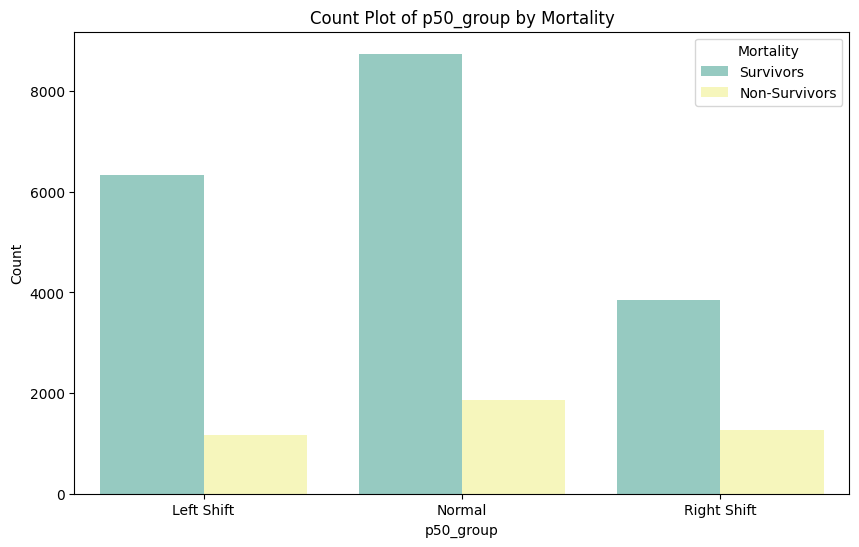

In [42]:
import matplotlib
# matplotlib.use('tkagg')  # Use Tkinter backend

import seaborn as sns
import matplotlib.pyplot as plt

# # Convert 'in_hospital_mortality' to strings ('0' or '1')
# df['in_hospital_mortality'] = df['in_hospital_mortality'].astype(str)

# Create a count plot to compare 'p50_group' categories with respect to mortality
plt.figure(figsize=(10, 6))
sns.countplot(x='p50_group', hue='in_hospital_mortality', data=df, palette='Set3', order=['Left Shift', 'Normal', 'Right Shift'])
plt.title('Count Plot of p50_group by Mortality')
plt.xlabel('p50_group')
plt.ylabel('Count')
plt.legend(title='Mortality', labels=['Survivors', 'Non-Survivors'])
plt.show()

## pH, pCO2, and HCO3 Grouping and Box Plot

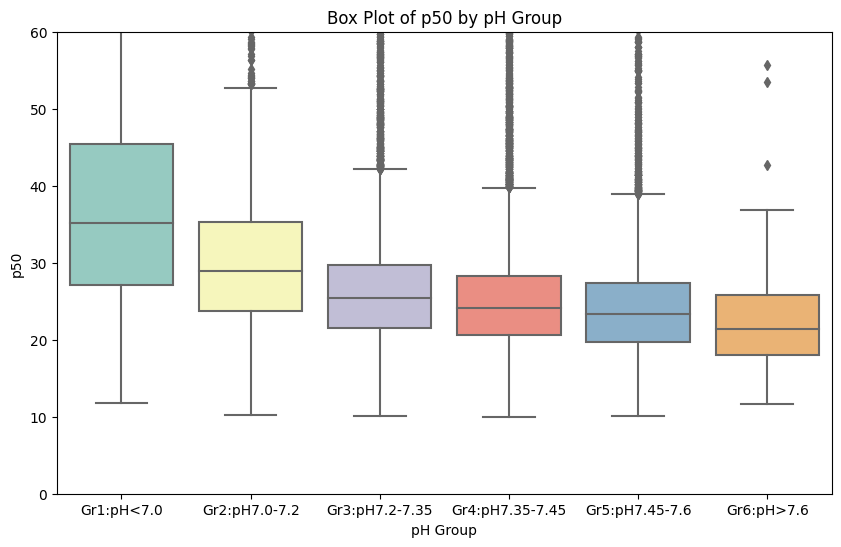

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define pH groups
def get_pH_group(pH):
    if pH < 7.0:
        return 'Gr1:pH<7.0'
    elif pH < 7.2:
        return 'Gr2:pH7.0-7.2'
    elif pH < 7.35:
        return 'Gr3:pH7.2-7.35'
    elif pH < 7.45:
        return 'Gr4:pH7.35-7.45'
    elif pH < 7.6:
        return 'Gr5:pH7.45-7.6'
    else:
        return 'Gr6:pH>7.6'

# Apply grouping functions to create new columns
df['pHGr'] = df['pH'].apply(get_pH_group)

# Specify the order of pHGr categories
order = ['Gr1:pH<7.0', 'Gr2:pH7.0-7.2', 'Gr3:pH7.2-7.35', 'Gr4:pH7.35-7.45', 'Gr5:pH7.45-7.6', 'Gr6:pH>7.6']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='pHGr', y='p50', data=df, palette='Set3', order=order)
plt.ylim(0, 60)
plt.title('Box Plot of p50 by pH Group')
plt.xlabel('pH Group')
plt.ylabel('p50')
plt.show()


## ANOVA and Box Plot for pCO2 Groups vs. p50

                 sum_sq       df          F        PR(>F)
C(pCO2Gr)  8.393105e+03      6.0  11.951248  1.916892e-13
Residual   2.717467e+06  23217.0        NaN           NaN


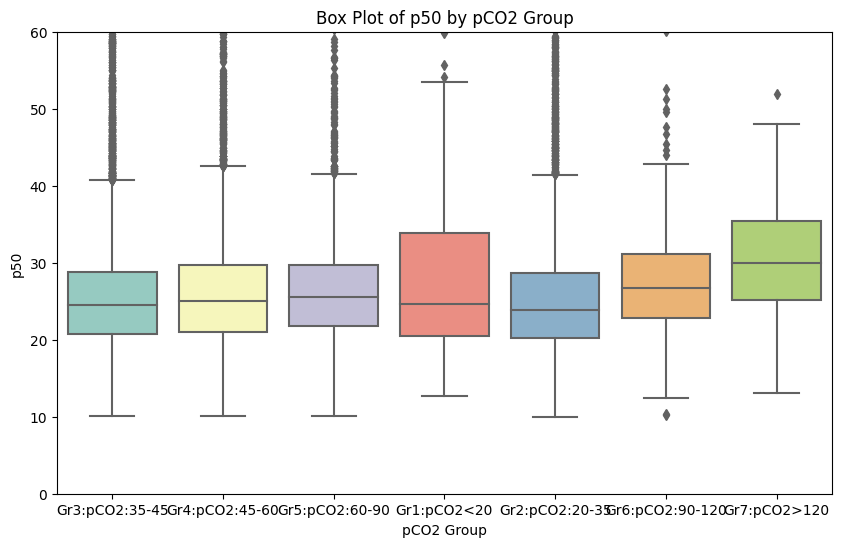

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define pCO2 groups
def get_pCO2_group(pCO2):
    if pCO2 < 20:
        return 'Gr1:pCO2<20'
    elif pCO2 < 35:
        return 'Gr2:pCO2:20-35'
    elif pCO2 < 45:
        return 'Gr3:pCO2:35-45'
    elif pCO2 < 60:
        return 'Gr4:pCO2:45-60'
    elif pCO2 < 90:
        return 'Gr5:pCO2:60-90'
    elif pCO2 < 120:
        return 'Gr6:pCO2:90-120'
    else:
        return 'Gr7:pCO2>120'

# Apply grouping functions to create new columns
df['pCO2Gr'] = df['pCO2'].apply(get_pCO2_group)

# Perform ANOVA
model = ols('p50 ~ C(pCO2Gr)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='pCO2Gr', y='p50', data=df, palette='Set3')
plt.ylim(0, 60)
plt.title('Box Plot of p50 by pCO2 Group')
plt.xlabel('pCO2 Group')
plt.ylabel('p50')
plt.show()


## ANOVA and Box Plot for HCO3 Groups vs. p50

                 sum_sq       df          F        PR(>F)
C(pCO2Gr)  8.393105e+03      6.0  11.951248  1.916892e-13
Residual   2.717467e+06  23217.0        NaN           NaN


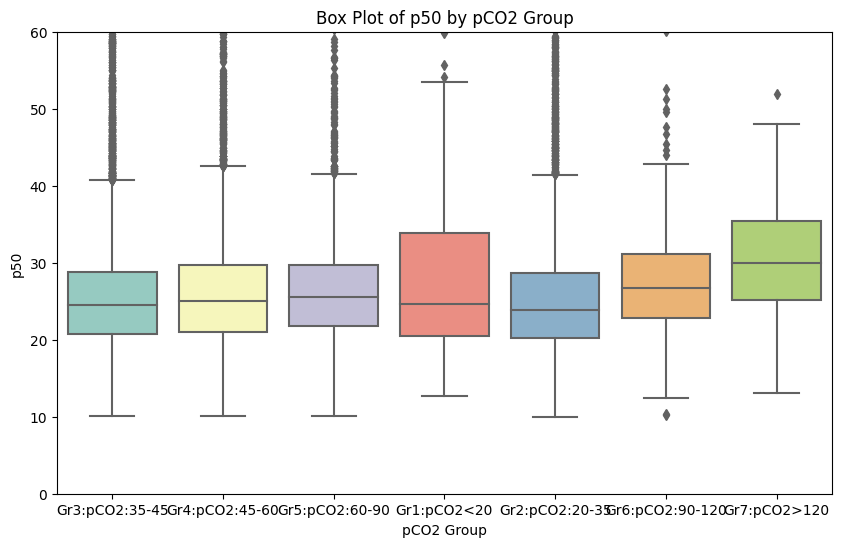

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Define pCO2 groups
def get_pCO2_group(pCO2):
    if pCO2 < 20:
        return 'Gr1:pCO2<20'
    elif pCO2 < 35:
        return 'Gr2:pCO2:20-35'
    elif pCO2 < 45:
        return 'Gr3:pCO2:35-45'
    elif pCO2 < 60:
        return 'Gr4:pCO2:45-60'
    elif pCO2 < 90:
        return 'Gr5:pCO2:60-90'
    elif pCO2 < 120:
        return 'Gr6:pCO2:90-120'
    else:
        return 'Gr7:pCO2>120'

# Apply grouping functions to create new columns
df['pCO2Gr'] = df['pCO2'].apply(get_pCO2_group)

# Perform ANOVA
model = ols('p50 ~ C(pCO2Gr)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='pCO2Gr', y='p50', data=df, palette='Set3')
plt.ylim(0, 60)
plt.title('Box Plot of p50 by pCO2 Group')
plt.xlabel('pCO2 Group')
plt.ylabel('p50')
plt.show()


                 sum_sq       df          F        PR(>F)
C(HCO3Gr)  1.588352e+04      5.0  27.216746  1.470228e-27
Residual   2.709976e+06  23218.0        NaN           NaN


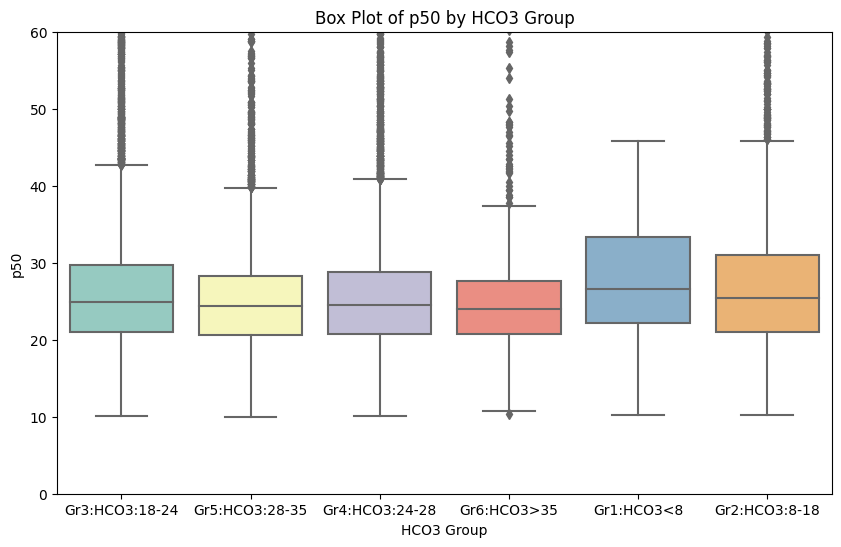

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


p50df = df

# Define HCO3 groups
def get_HCO3_group(bmp_bicarbonate):
    if bmp_bicarbonate < 8:
        return 'Gr1:HCO3<8'
    elif bmp_bicarbonate < 18:
        return 'Gr2:HCO3:8-18'
    elif bmp_bicarbonate < 24:
        return 'Gr3:HCO3:18-24'
    elif bmp_bicarbonate < 28:
        return 'Gr4:HCO3:24-28'
    elif bmp_bicarbonate < 35:
        return 'Gr5:HCO3:28-35'
    else:
        return 'Gr6:HCO3>35'

# Apply grouping functions to create a new column
p50df['HCO3Gr'] = p50df['bmp_bicarbonate'].apply(get_HCO3_group)

# Perform ANOVA
model = ols('p50 ~ C(HCO3Gr)', data=p50df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_table)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HCO3Gr', y='p50', data=p50df, palette='Set3')
plt.ylim(0, 60)
plt.title('Box Plot of p50 by HCO3 Group')
plt.xlabel('HCO3 Group')
plt.ylabel('p50')
plt.show()

## Scatter Plot with Non-Straight Regression Lines and Darker Color for Lines

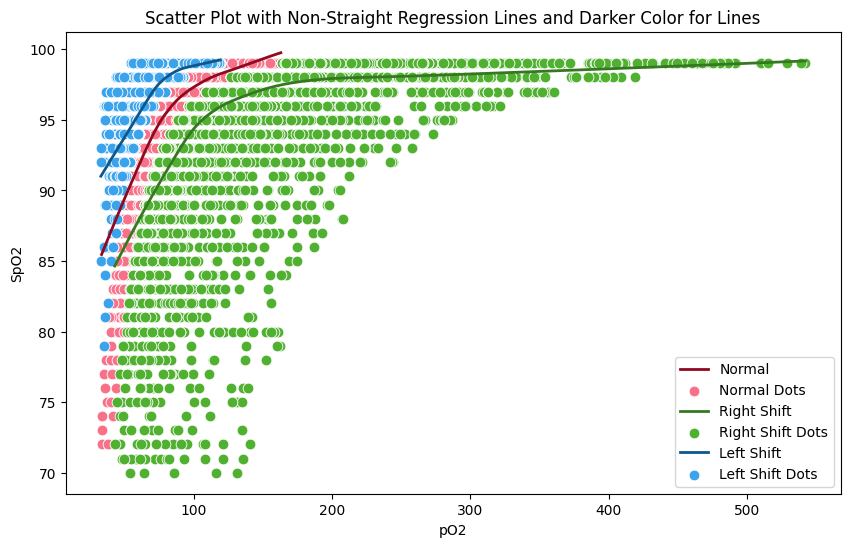

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

p50df = df

# Define a function to categorize p50 values
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Add the p50Gr column to the DataFrame
p50df['p50Gr'] = p50df['p50'].apply(p50_category)

# Linear regression models
model1 = ols('p50 ~ C(pHGr) + C(pCO2Gr) + C(HCO3Gr)', data=p50df).fit()
model2 = ols('p50 ~ pH + pCO2 + bmp_bicarbonate', data=p50df).fit()

# Recreate scatter plot with non-straight regression lines for different categories
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(p50df['p50Gr'].unique()))

for category, color in zip(p50df['p50Gr'].unique(), palette):
    category_data = p50df[p50df['p50Gr'] == category]

    # Choose a darker shade of the same color for the line
    line_color = sns.set_hls_values(color, l=0.3)

    sns.regplot(
        x='pO2',
        y='SpO2',
        data=category_data,
        color=line_color,
        label=category,
        lowess=True,  # Use lowess regression for non-straight lines
        scatter=False,  # Hide scatter points in the regression line
        line_kws={'lw': 2}  # Adjust line thickness as needed
    )

    sns.scatterplot(
        x='pO2',
        y='SpO2',
        data=category_data,
        color=color,
        label=f'{category} Dots',
        s=60  # Adjust the size of the dots as needed
    )

plt.title('Scatter Plot with Non-Straight Regression Lines and Darker Color for Lines')
plt.xlabel('pO2')
plt.ylabel('SpO2')
plt.legend()
plt.show()


## ANOVA on admission_age, comorbidity_score_value, sofa_past_overall_24hr

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.discrete.discrete_model import Logit
from lifelines import KaplanMeierFitter
import scipy.stats as stats

p50df = df

# Define a function to categorize p50 values
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Create the p50Gr variable based on the p50_category function
p50df['p50Gr'] = p50df['p50'].apply(p50_category)

# Perform ANOVA on admission_age
model_age = ols('admission_age ~ p50Gr', data=p50df).fit()
anova_age = anova_lm(model_age)

print("\nANOVA on admission_age:")
print(anova_age)

# Perform ANOVA on comorbidity_score_value
model_comorbidity = ols('comorbidity_score_value ~ p50Gr', data=p50df).fit()
anova_comorbidity = anova_lm(model_comorbidity)

print("\nANOVA on comorbidity_score_value:")
print(anova_comorbidity)

# Perform ANOVA on sofa_past_overall_24hr
model_sofa = ols('sofa_past_overall_24hr ~ p50Gr', data=p50df).fit()
anova_sofa = anova_lm(model_sofa)

print("\nANOVA on sofa_past_overall_24hr:")
print(anova_sofa)


ANOVA on admission_age:
               df        sum_sq      mean_sq         F    PR(>F)
p50Gr         2.0  2.813908e+03  1406.953963  5.951158  0.002607
Residual  23221.0  5.489836e+06   236.416853       NaN       NaN

ANOVA on comorbidity_score_value:
               df         sum_sq   mean_sq         F    PR(>F)
p50Gr         2.0       6.913303  3.456652  0.366059  0.693466
Residual  23221.0  219273.030505  9.442876       NaN       NaN

ANOVA on sofa_past_overall_24hr:
               df         sum_sq     mean_sq          F        PR(>F)
p50Gr         2.0     330.846555  165.423278  13.825583  9.981547e-07
Residual  23221.0  277839.569523   11.965013        NaN           NaN


## Chi-squared test

In [49]:
# Chi-squared test for p50Gr and sex_female
chisq_sex = stats.chi2_contingency(pd.crosstab(p50df['p50Gr'], p50df['sex_female']))

print("\nChi-squared test for p50Gr and sex_female:")
print(f"Chi-squared = {chisq_sex[0]:.3f}, p-value = {chisq_sex[1]:.6f}")



Chi-squared test for p50Gr and sex_female:
Chi-squared = 12.707, p-value = 0.001741


## Kaplan-Meier Survival Curves

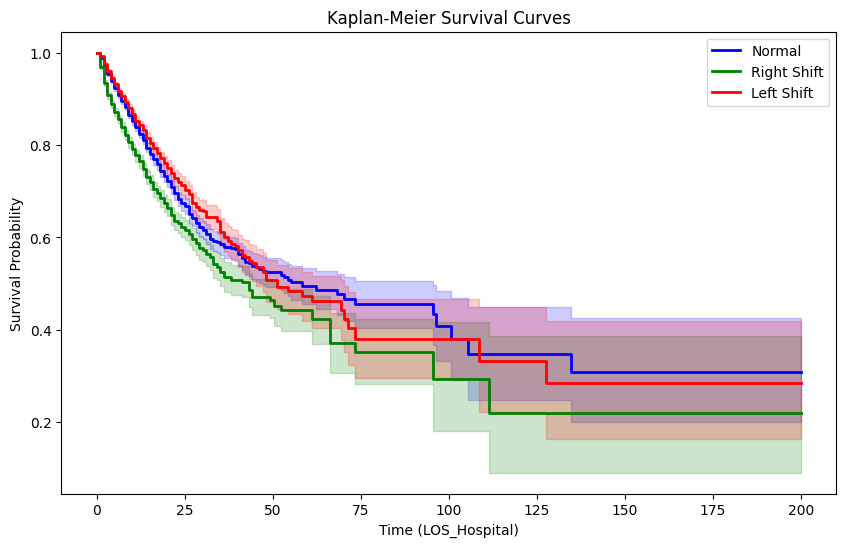

In [50]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np

# Define a function to categorize p50 values
def p50_category(p50_value):
    if p50_value > 30:
        return 'Right Shift'
    elif 22 <= p50_value <= 30:
        return 'Normal'
    else:
        return 'Left Shift'

# Apply the p50 category function to create a new column 'p50_category'
df['p50_category'] = df['p50'].apply(p50_category)

# Create KaplanMeierFitter
kmf = KaplanMeierFitter()

# Set up plot colors
colors = ['blue', 'green', 'red']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Define a custom time grid for smoother curves
time_grid = np.linspace(0, 200, 200)  # Adjust the range to 0-200

# Plot Kaplan-Meier survival curves with kernel smoothing
for i, category in enumerate(df['p50_category'].unique()):
    mask = (df['p50_category'] == category)
    times = df['los_hospital'][mask]
    events = df['in_hospital_mortality'][mask]

    # Plot the survival curve with kernel smoothing
    kmf.fit(times, event_observed=events, timeline=time_grid, label=category)
    kmf.plot(ax=ax, color=colors[i], linewidth=2, ci_alpha=0.2)

# Add labels to the axes
ax.set_title('Kaplan-Meier Survival Curves')
ax.set_xlabel('Time (LOS_Hospital)')
ax.set_ylabel('Survival Probability')

# Add legend
ax.legend()

plt.show()


# Analyzing the Impact of p50 on Predicting Hospital Mortality

### Feature Importance Analysis for logistic regression 

In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm  # Assuming you're using statsmodels for the constant

# Assuming df is your DataFrame, 'p50' is one of the features, and 'in_hospital_mortality' is the target variable

# Select relevant columns
selected_features = ['p50',
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'in_hospital_mortality', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split the data into features (X) and target (y)
X = selected_df.drop('in_hospital_mortality', axis=1)  # Include all other features
y = selected_df['in_hospital_mortality']

# Add a constant to the features since statsmodels does not add it by default
X = sm.add_constant(X)

# First, split data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the temp data into validation and test sets equally (50% each of temp, so 15% of total each)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tabulate import tabulate

# Assuming y_train and X_train are already defined and X_train includes a constant for the intercept
model = sm.Logit(y_train, X_train)
result = model.fit()

# Extracting the coefficients, p-values, and 95% confidence intervals
coefficients = result.params
p_values = result.pvalues
conf_int = result.conf_int()

# Convert the confidence intervals to a DataFrame for easier handling
conf_int_df = pd.DataFrame(conf_int, columns=['95% CI Lower Bound', '95% CI Upper Bound'])

# Create a DataFrame for easier viewing
feature_importance = pd.DataFrame({'Feature': X_train.columns, 
                                   'Coefficient': coefficients, 
                                   'P-value': p_values})

# Join the confidence intervals with the feature importance DataFrame
feature_importance = feature_importance.join(conf_int_df)

# Calculate the absolute values to rank by importance
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])

# Sort the features by the absolute value of their coefficient
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Print the results in a table using tabulate
table = tabulate(feature_importance, headers='keys', tablefmt='pretty', showindex=False)
print("Feature Importance in Logistic Regression with P-values and Confidence Intervals:")
print(table)

Optimization terminated successfully.
         Current function value: 0.444537
         Iterations 7
Feature Importance in Logistic Regression with P-values and Confidence Intervals:
+-----------------------------------+------------------------+------------------------+--------------------+--------------------+-----------------------+
|              Feature              |      Coefficient       |        P-value         | 95% CI Lower Bound | 95% CI Upper Bound | Absolute Coefficient  |
+-----------------------------------+------------------------+------------------------+--------------------+--------------------+-----------------------+
|               const               |   -2.612281115326028   |          nan           |        nan         |        nan         |   2.612281115326028   |
| comorbidity_score_name_Elixhauser |   -1.969752893036975   |          nan           |        nan         |        nan         |   1.969752893036975   |
|  comorbidity_score_name_Charlson  |  -0.6425

Coefficient Sign: The sign (positive or negative) of each coefficient indicates the direction of its relationship with the likelihood of the event (in-hospital mortality in this case). A positive coefficient increases the log-odds of the event as the value of the feature increases, while a negative coefficient decreases it.

## Gradient Boosting 

## Performance Metrics: AUC ROC and AUC Precision

In [58]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select relevant columns including 'p50'
selected_features = [
    'sofa_past_overall_24hr',
    'comorbidity_score_value', 'cbc_hemoglobin', 'bmp_sodium', 'admission_age',
    'p50', 'comorbidity_score_name_Charlson', 'comorbidity_score_name_Elixhauser',
    'in_hospital_mortality'
]

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Split data into train, validate, and test sets
X = selected_df.drop('in_hospital_mortality', axis=1)
y = selected_df['in_hospital_mortality']

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train(70%), Validate(15%), Test(15%) split 
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Gradient Boosting model (including 'p50')
model_with_p50 = GradientBoostingClassifier()
model_with_p50.fit(X_train, y_train)

# Calculate AUC ROC and AUC Precision on the validation set (including 'p50')
auc_roc_validation_with_p50 = roc_auc_score(y_validate, model_with_p50.predict_proba(X_validate)[:, 1])
auc_precision_validation_with_p50 = roc_auc_score(y_validate, model_with_p50.predict(X_validate))

# Calculate AUC ROC and AUC Precision on the test set (including 'p50')
auc_roc_test_with_p50 = roc_auc_score(y_test, model_with_p50.predict_proba(X_test)[:, 1])
auc_precision_test_with_p50 = roc_auc_score(y_test, model_with_p50.predict(X_test))

# Print results for the model including 'p50'
print("Model with 'p50' Feature Performance:")
print("{:<20} {:<20} {:<20}".format('Metric', 'Validation Set', 'Test Set'))
print("{:<20} {:<20.5f} {:<20.5f}".format('AUC ROC', auc_roc_validation_with_p50, auc_roc_test_with_p50))
print("{:<20} {:<20.5f} {:<20.5f}".format('AUC Precision', auc_precision_validation_with_p50, auc_precision_test_with_p50))

# Print a separator for comparison
print("\n" + "="*50 + "\n")

# Initialize and train the Gradient Boosting model (baseline without 'p50')
baseline_model = GradientBoostingClassifier()
baseline_model.fit(X_train[:, :-1], y_train)  # Exclude 'p50' feature

# Calculate AUC ROC and AUC Precision on the validation set (baseline without 'p50')
auc_roc_validation_baseline = roc_auc_score(y_validate, baseline_model.predict_proba(X_validate[:, :-1])[:, 1])
auc_precision_validation_baseline = roc_auc_score(y_validate, baseline_model.predict(X_validate[:, :-1]))

# Calculate AUC ROC and AUC Precision on the test set (baseline without 'p50')
auc_roc_test_baseline = roc_auc_score(y_test, baseline_model.predict_proba(X_test[:, :-1])[:, 1])
auc_precision_test_baseline = roc_auc_score(y_test, baseline_model.predict(X_test[:, :-1]))

# Print results for the baseline model without 'p50'
print("Baseline Model Performance (without 'p50' feature):")
print("{:<20} {:<20} {:<20}".format('Metric', 'Validation Set', 'Test Set'))
print("{:<20} {:<20.5f} {:<20.5f}".format('AUC ROC', auc_roc_validation_baseline, auc_roc_test_baseline))
print("{:<20} {:<20.5f} {:<20.5f}".format('AUC Precision', auc_precision_validation_baseline, auc_precision_test_baseline))

Model with 'p50' Feature Performance:
Metric               Validation Set       Test Set            
AUC ROC              0.70366              0.68978             
AUC Precision        0.52561              0.52804             


Baseline Model Performance (without 'p50' feature):
Metric               Validation Set       Test Set            
AUC ROC              0.70361              0.68978             
AUC Precision        0.52561              0.52804             


## Statistical test to assess the uncertainty of the computed metrics

In [59]:
from sklearn.metrics import precision_score
import numpy as np

def bootstrap_metric_difference(X, y, n_bootstrap=100):
    roc_differences = []
    precision_differences = []
    
    for _ in range(n_bootstrap):
        # Bootstrap sample
        indices = np.random.choice(range(len(y)), size=len(y), replace=True)
        X_sample = X[indices]
        y_sample = y.iloc[indices]
        
        # Split the bootstrap sample
        X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)
        
        # Model with 'p50'
        model_with_p50.fit(X_train_sample, y_train_sample)
        roc_with_p50 = roc_auc_score(y_test_sample, model_with_p50.predict_proba(X_test_sample)[:, 1])
        precision_with_p50 = precision_score(y_test_sample, model_with_p50.predict(X_test_sample), zero_division=0)
        
        # Baseline model (without 'p50')
        baseline_model.fit(X_train_sample[:, :-1], y_train_sample)
        roc_baseline = roc_auc_score(y_test_sample, baseline_model.predict_proba(X_test_sample[:, :-1])[:, 1])
        precision_baseline = precision_score(y_test_sample, baseline_model.predict(X_test_sample[:, :-1]), zero_division=0)
        
        # Compute differences
        roc_differences.append(roc_with_p50 - roc_baseline)
        precision_differences.append(precision_with_p50 - precision_baseline)
    
    return np.array(roc_differences), np.array(precision_differences)


In [55]:
# Call the bootstrap function
roc_differences, precision_differences = bootstrap_metric_difference(X_scaled, y)

# Calculate 95% CI and p-value for AUC ROC
ci_roc = np.percentile(roc_differences, [2.5, 97.5])
p_value_roc = (roc_differences <= 0).mean()

# Calculate 95% CI and p-value for AUC Precision
ci_precision = np.percentile(precision_differences, [2.5, 97.5])
p_value_precision = (precision_differences <= 0).mean()

# Print the results
print(f"AUC ROC Difference 95% CI: {ci_roc}, p-value: {p_value_roc}")
print(f"AUC Precision Difference 95% CI: {ci_precision}, p-value: {p_value_precision}")


AUC ROC Difference 95% CI: [0.00470063 0.01699548], p-value: 0.0
AUC Precision Difference 95% CI: [-0.05371659  0.06704142], p-value: 0.41


## Gradient Boosting Feature Importance 

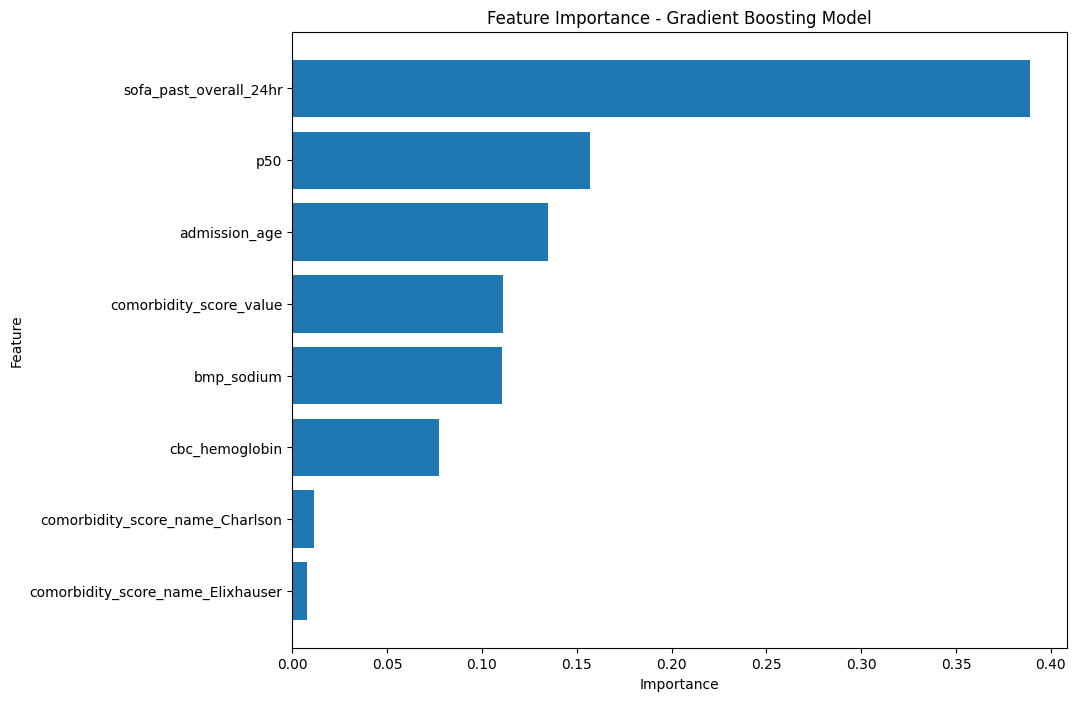

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'selected_features' contains all the features used, excluding the target variable
feature_names = selected_features[:-1]  # Exclude 'in_hospital_mortality' from the feature list

# Extract feature importances
feature_importances = model_with_p50.feature_importances_

# Create a DataFrame for easier viewing and manipulation
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [61]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import numpy as np

def bootstrap_permutation_importance(model, X, y, n_iterations=30):
    # Storage for importances
    importances = np.zeros((n_iterations, X.shape[1]))
    
    for i in range(n_iterations):
        # Calculate permutation importance for this iteration
        r = permutation_importance(model, X, y, n_repeats=10, random_state=i, scoring='roc_auc')
        importances[i] = r.importances_mean
    
    # Calculate 95% CIs and means
    ci_lower = np.percentile(importances, 2.5, axis=0)
    ci_upper = np.percentile(importances, 97.5, axis=0)
    means = np.mean(importances, axis=0)
    
    return means, ci_lower, ci_upper

# Assuming model_with_p50 is your trained Gradient Boosting model and X_test, y_test are your test sets
means, ci_lower, ci_upper = bootstrap_permutation_importance(model_with_p50, X_test, y_test, n_iterations=30)

# For visualization or reporting, you might create a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Mean Importance': means, '95% CI Lower': ci_lower, '95% CI Upper': ci_upper})
importance_df = importance_df.sort_values(by='Mean Importance', ascending=False)

print(importance_df)


                             Feature  Mean Importance  95% CI Lower  \
0             sofa_past_overall_24hr         0.069513      0.065144   
1            comorbidity_score_value         0.031596      0.028865   
4                      admission_age         0.027482      0.024922   
5                                p50         0.018926      0.017061   
3                         bmp_sodium         0.016297      0.014046   
2                     cbc_hemoglobin         0.002811      0.001325   
6    comorbidity_score_name_Charlson         0.001051      0.000505   
7  comorbidity_score_name_Elixhauser         0.000631      0.000132   

   95% CI Upper  
0      0.073027  
1      0.034221  
4      0.029542  
5      0.020579  
3      0.018305  
2      0.003653  
6      0.001738  
7      0.001317  


## SHARP on Gradient Boosting 

<class 'numpy.ndarray'>


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


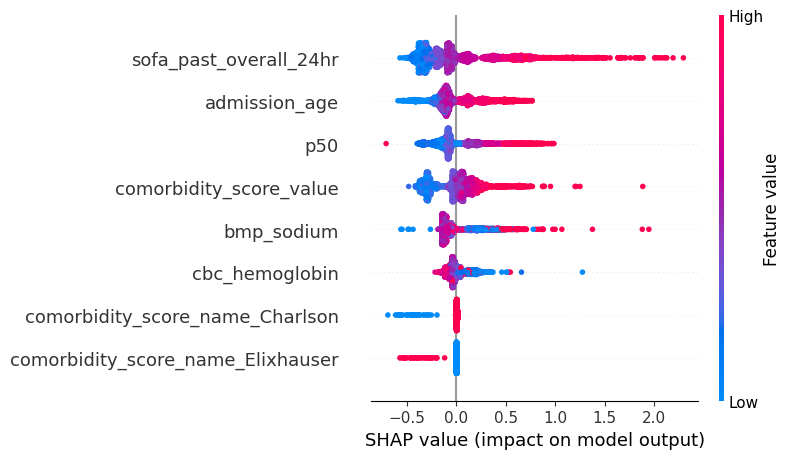

In [64]:
import shap

# Initialize the SHAP Explainer with your Gradient Boosting model
explainer = shap.TreeExplainer(model_with_p50)

# Compute SHAP values for the validation set
shap_values = explainer.shap_values(X_validate)

# Check the structure of shap_values to ensure correct usage
print(type(shap_values))
if isinstance(shap_values, list):
    print(f"SHAP values list length: {len(shap_values)}")
    # Assuming binary classification and SHAP returns a list of arrays
    try:
        # Use index [1] for the positive class, if applicable
        shap.summary_plot(shap_values[1], X_validate, feature_names=selected_features[:-1])
    except IndexError:
        print("IndexError: SHAP values do not have a separate array for each class. Trying a different approach.")
        shap.summary_plot(shap_values, X_validate, feature_names=selected_features[:-1])
else:
    # Directly use shap_values if it's not a list
    shap.summary_plot(shap_values, X_validate, feature_names=selected_features[:-1])


Interpretation: When the 'p50' feature is high (red points), it tends to push the model's output towards the right, suggesting that higher values of 'p50' may be associated with an increased likelihood of the positive class (mortality). Conversely, lower values (blue points) tend to have a range of impacts but are mostly centered around zero or slightly to the left, indicating a less consistent or possibly a negative relationship with the likelihood of the positive class.

### Next steps: 
* Optimizing further Grading Boosting to further prove the predictive power of p50
    * GridSearchCV
* "By incorporating the p50 feature into pre-trained mortality prediction models, we aim to assess whether this addition leads to an improvement in accuracy. 
  *  OASIS
  *  "Reproducibility in critical care: a mortality prediction case study" Link: https://proceedings.mlr.press/v68/johnson17a.html